Monthly Summary:
Month1:$0.00
Month2:$0.00
Month3:$0.00
Month4:$399.17
Month5:$294.08
Month6:$130.35
Month7:$954.13
Month8:$0.00
Month9:$0.00
Month10:$0.00
Month11:$0.00
Month12:$0.00

Total Charged:$1777.73
Total Transactions:59
Average Transaction:$30.13
Median Transaction:$ 15.95
Maximum Transaction:$210.99
Minimum Transaction:$1.04
Standard Deviation:$36.11
Variance:$1304.13


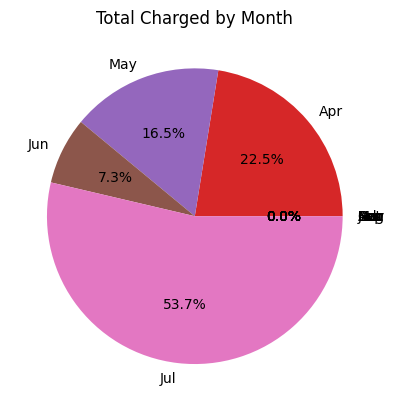

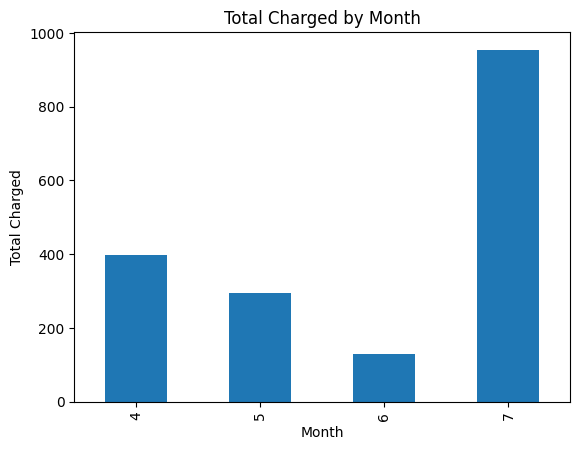

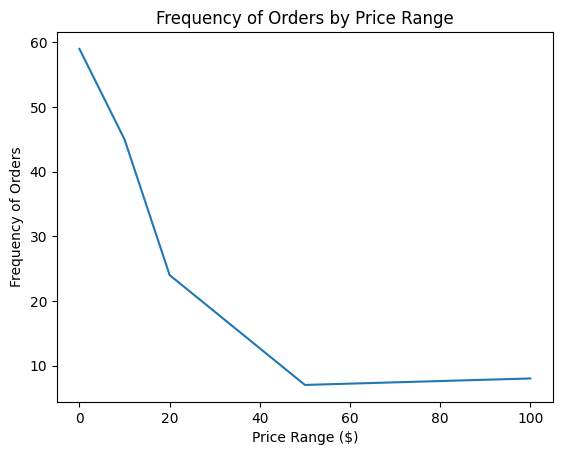

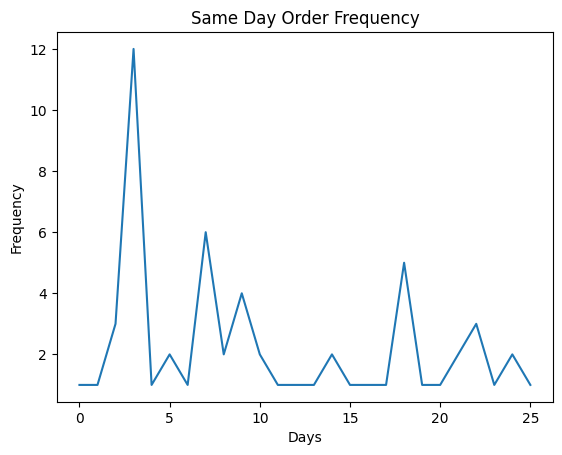

In [137]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
total_charged=[]
dates=[]

with open('amazon-orders.csv') as file:
    reader=csv.DictReader(file)
    for row in reader:
        total_charged.append(float(row['Total Charged'][1:]))  
        dates.append(datetime.strptime(row['Order Date'],'%m/%d/%y'))

total_charged_sum=sum(total_charged)
total_charged_count=len(total_charged)
total_charged_avg=total_charged_sum/ total_charged_count

total_charged_med=sorted(total_charged)[total_charged_count//2]
total_charged_max=max(total_charged)
total_charged_min=min(total_charged)

total_charged_std=(sum((x - total_charged_avg)**2 for x in total_charged)/total_charged_count)**0.5
total_charged_var=sum((x - total_charged_avg)**2 for x in total_charged)/total_charged_count
print("Monthly Summary:")

for month in range(1,13):
    month_total_charged= sum([total_charged[i] for i in range(total_charged_count) if dates[i].month==month])
    print(f"Month{month}:${month_total_charged:.2f}")

print(f"\nTotal Charged:${total_charged_sum:.2f}")
print(f"Total Transactions:{total_charged_count}")
print(f"Average Transaction:${total_charged_avg:.2f}")
print(f"Median Transaction:${total_charged_med: .2f}")
print(f"Maximum Transaction:${total_charged_max:.2f}")
print(f"Minimum Transaction:${total_charged_min:.2f}")
print(f"Standard Deviation:${total_charged_std:.2f}")
print(f"Variance:${total_charged_var:.2f}")

labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
values=[sum([total_charged[i] for i in range(total_charged_count) if dates[i].month==month]) for month in range(1,13)]

plt.pie(values,labels=labels, autopct='%1.1f%%')
plt.title('Total Charged by Month')
plt.show()

df=pd.DataFrame({'Total Charged':total_charged,'Date':dates})
df['Month']=df['Date'].dt.month
df_grouped=df.groupby('Month').sum()
df_grouped.plot(kind='bar',legend=None)

plt.xlabel('Month')
plt.ylabel('Total Charged')
plt.title('Total Charged by Month')
plt.show()

price_ranges=[0,10,20,50,100]
freq=[0]*len(price_ranges)
with open('amazon-orders.csv') as file:
    reader=csv.DictReader(file)
    for row in reader:
        total_charged= float(row['Total Charged'][1:])
        for i in range(len(price_ranges)):
            if total_charged > price_ranges[i]:
                freq[i]+=1
        if total_charged > price_ranges[-1]:
            freq[-1]+=1

plt.plot(price_ranges,freq)
plt.xlabel('Price Range ($)')
plt.ylabel('Frequency of Orders')
plt.title('Frequency of Orders by Price Range')
plt.show()

value=pd.read_csv('amazon-orders.csv')
value['Order Date']=pd.to_datetime(value['Order Date'])
value['days']=(value['Order Date']- value['Order Date'].min()).dt.days
same_day_counts=value.groupby((value['days'].diff()== 0).cumsum())['days'].count()
plt.plot(range(len(same_day_counts)),same_day_counts.values)
plt.title('Same Day Order Frequency')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()